In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import glob
beagle = glob.glob("C:\\Users\\rishi\\OneDrive\\Documents\\SELENIUM\\Dog_Data\\0\\*.*")
Golden_Retrievers = glob.glob("C:\\Users\\rishi\\OneDrive\\Documents\\SELENIUM\\Dog_Data\\1\\*.*")
Huskey = glob.glob("C:\\Users\\rishi\\OneDrive\\Documents\\SELENIUM\\Dog_Data\\2\\*.*")
Labrador_Retrievers = glob.glob("C:\\Users\\rishi\\OneDrive\\Documents\\SELENIUM\\Dog_Data\\3\\*.*")
Poodles = glob.glob("C:\\Users\\rishi\\OneDrive\\Documents\\SELENIUM\\Dog_Data\\4\\*.*")

data = []
labels = []

for i in beagle:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (128,128))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in Golden_Retrievers:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (128,128))
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in Huskey:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (128,128))
    image=np.array(image)
    data.append(image)
    labels.append(2)
for i in Labrador_Retrievers:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (128,128))
    image=np.array(image)
    data.append(image)
    labels.append(3)
for i in Poodles:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (128,128))
    image=np.array(image)
    data.append(image)
    labels.append(4)

data = np.array(data)
labels = np.array(labels)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [10]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(128, 128,3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    #tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.Dense(128, activation='relu'), 
   
    tf.keras.layers.Dense(10)
])

In [11]:
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=12,
    validation_data=(X_val, y_val)
)
        

Epoch 1/12
16/16 [==============================] - 22s 1s/step - loss: 293.6471 - accuracy: 0.1811 - val_loss: 2.2629 - val_accuracy: 0.2500
Epoch 2/12
16/16 [==============================] - 20s 1s/step - loss: 1.7433 - accuracy: 0.3346 - val_loss: 1.7676 - val_accuracy: 0.3125
Epoch 3/12
16/16 [==============================] - 20s 1s/step - loss: 1.3184 - accuracy: 0.4685 - val_loss: 1.6402 - val_accuracy: 0.3906
Epoch 4/12
16/16 [==============================] - 20s 1s/step - loss: 0.8795 - accuracy: 0.6457 - val_loss: 1.6614 - val_accuracy: 0.3438
Epoch 5/12
16/16 [==============================] - 20s 1s/step - loss: 0.5935 - accuracy: 0.7933 - val_loss: 1.7918 - val_accuracy: 0.3281
Epoch 6/12
16/16 [==============================] - 20s 1s/step - loss: 0.4260 - accuracy: 0.8425 - val_loss: 2.3658 - val_accuracy: 0.3125
Epoch 7/12
16/16 [==============================] - 21s 1s/step - loss: 0.3107 - accuracy: 0.8996 - val_loss: 2.6352 - val_accuracy: 0.3906
Epoch 8/12
16/16 [

In [13]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 1s 230ms/step - loss: 4.8904 - accuracy: 0.3906


[4.89040470123291, 0.390625]

In [14]:
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(predicted_classes,axis=1)

2/2 [==============================] - 1s 223ms/step


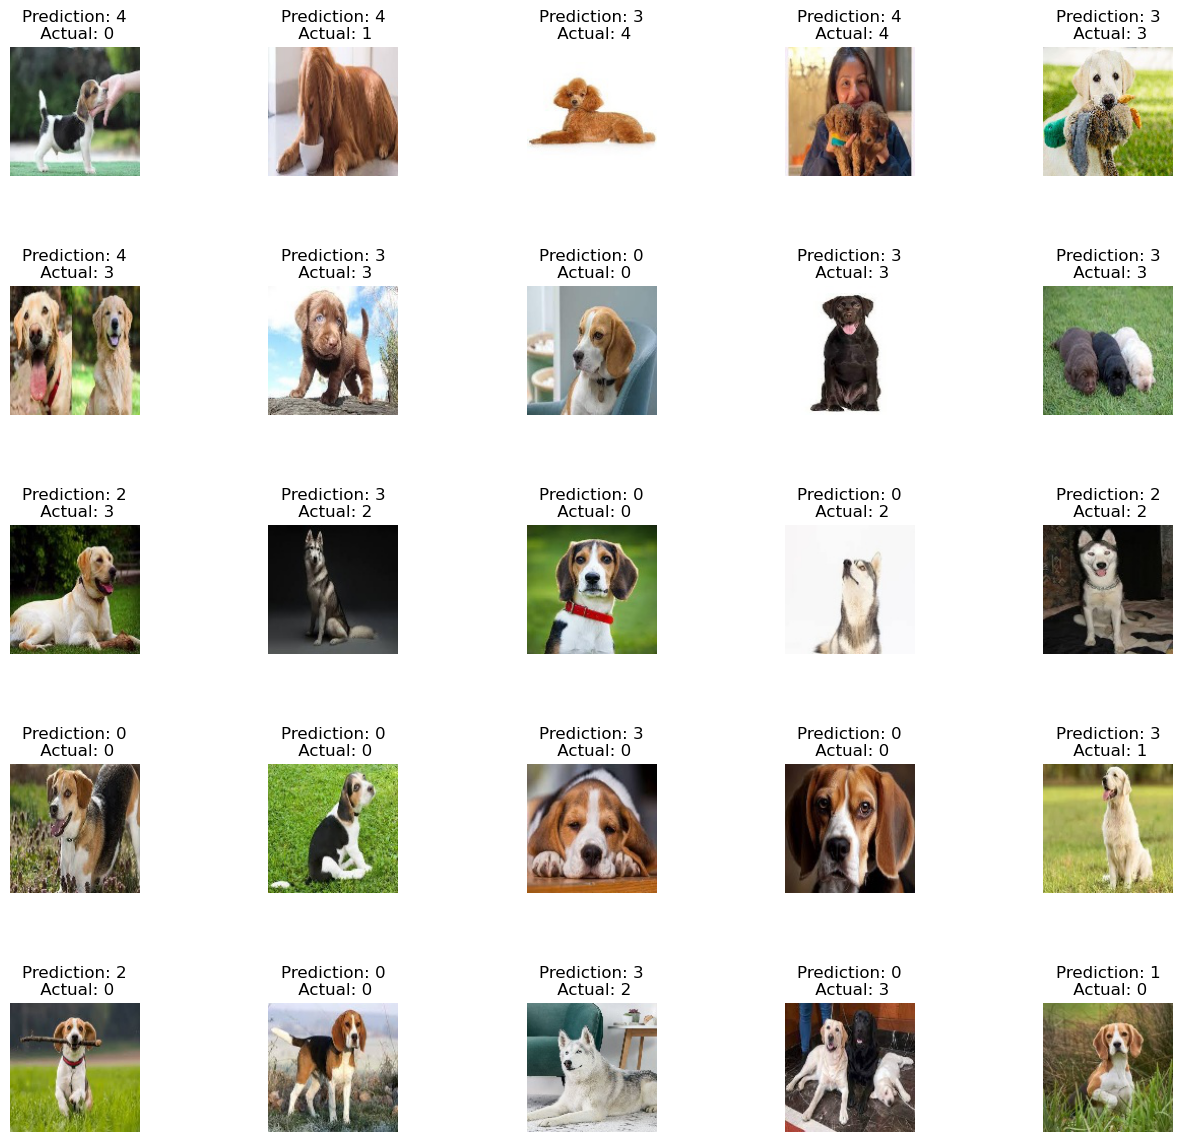

In [15]:
L=5
W=5
fig,axes = plt.subplots(L,W,figsize=(15,15))
axes = axes.ravel()

for i in range(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction: {}\n Actual: {}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=1)